Library imports.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  3 16:45:24 2019

@author: Miguel Cárdenas-Montes
"""

#print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, RationalQuadratic, ExpSineSquared

import pandas as pd  

from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates

Data array

In [2]:
#mdnRnA = [87.0, 99.0, 87.0, 79.0, 73.0, 63.0,  #S2 2013
#    63.0, 76.5, 80.0, 92.0, 83.0, 76.0,    #S1 2014
#    74.0, 87.0, 88.0, 82.0, 74.0, 63.0,    #S2 2014
#    67.0, 67.0, 68.0, 75.0, 78.0, 96.0,    #S1 2015
#    86.0, 110.0, 95.0, 80.0, 73.0, 60.0,   #S2 2015
#    75.0, 73.0, 72.0, 71.0, 79.0, 97.0,    #S1 2016
#    79.0, 68.0, 77.0, 83.0, 74.0, 73.0,    #S2 2016
#    65.0, 77.0, 75.0, 71.0, 84.0, 88.0]    #S1 2017

#real_ahead=[73.0, 82.0, 91.0, 88.0]

mdnRnA = [87.0, 99.0, 87.0, 79.0, 73.0, 63.0,  #S2 2013
    63.0, 76.5, 80.0, 92.0, 83.0, 76.0,    #S1 2014
    74.0, 87.0, 88.0, 82.0, 74.0, 63.0,    #S2 2014
    67.0, 67.0, 68.0, 75.0, 78.0, 96.0,    #S1 2015
    86.0, 110.0, 95.0, 80.0, 73.0, 60.0,   #S2 2015
    75.0, 73.0, 72.0, 71.0, 79.0, 97.0,    #S1 2016
    79.0, 68.0, 77.0, 83.0, 74.0, 73.0,    #S2 2016
    65.0, 77.0, 75.0, 71.0, 84.0, 88.0,    #S1 2017
    73.0, 82.0, 91.0, 88.0, 63.0, 70.0,    #S2 2017
    71.0, 66.0, 73.0, 80.0, 83.0, 99.0]    #S1 2018
    
real_ahead=[97.0, 96.0, 87.0] # 2018 July-August-September

Creation of data estructures.

In [3]:
y = np.asarray(mdnRnA)

X= np.atleast_2d(np.arange(len(y))).T
print('y.shape: ',y.shape)
print('X.shape: ', X.shape)
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, len(y)+len(real_ahead), 1000)).T
print('x.shape: ',x.shape)

y.shape:  (60,)
X.shape:  (60, 1)
x.shape:  (1000, 1)


In [4]:
# Instantiate a Gaussi Process model
# Kernel with parameters given in GPML book
k1 = 66.0**2 * RBF(length_scale=67.0)  # long term smooth rising trend
k2 = 2.4**2 * RBF(length_scale=90.0) \
    * ExpSineSquared(length_scale=1.3, periodicity=1.0)  # seasonal component
# medium term irregularity
k3 = 0.66**2 \
    * RationalQuadratic(length_scale=1.2, alpha=0.78)
k4 = 0.18**2 * RBF(length_scale=0.134) \
    + WhiteKernel(noise_level=0.19**2)  # noise terms
kernel_gpml =  k3 + k4 # k1+k2+k3+k4

kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-1, 1e1))
print('kernel', kernel)

gp = GaussianProcessRegressor(kernel=kernel_gpml, n_restarts_optimizer=9) # in IJLP 9

kernel 1**2 * RBF(length_scale=10)


In [5]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

print(gp.kernel_)

80.6**2 * RationalQuadratic(alpha=0.00416, length_scale=4.59) + 0.00316**2 * RBF(length_scale=102) + WhiteKernel(noise_level=0.0542)


In [6]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

x.shape (1000, 1)


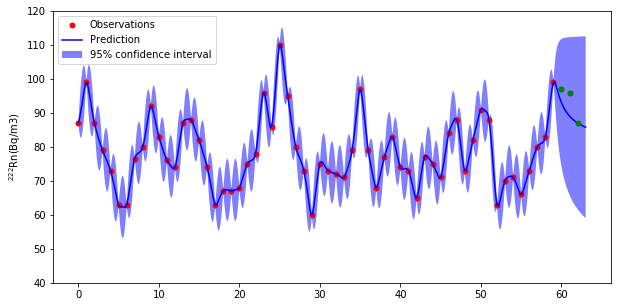

In [7]:
# ----------------------------------------------------------------------
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(1, (10,5))
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
print('x.shape', x.shape)
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.plot(np.arange(len(y),len(y)+len(real_ahead)),real_ahead, 'g.', markersize=10)

#plt.xlabel('$x$')
plt.ylabel("$^{222}$Rn(Bq/m3)")

plt.ylim(40, 120)
plt.legend(loc='upper left')

/home/cardenas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/home/cardenas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


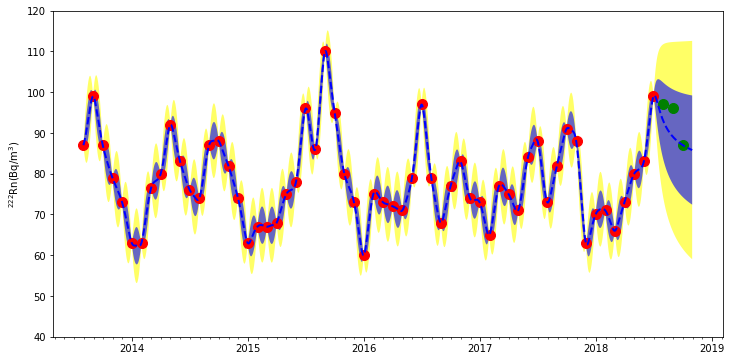

In [8]:
# ----------------------------------------------------------------------
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))# 6,6
plt.figure(1)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
daystart = pd.datetime(2013, 7, 1)
testdaystart = pd.datetime(2018, 7, 1)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

pd.date_range(daystart, periods=len(y), freq='M')

plt.plot(pd.date_range(daystart, periods=len(y), freq='M'), y, 'ro', markersize=10,  label='Observations')

plt.plot(pd.date_range(testdaystart, periods=len(real_ahead), freq='M'),real_ahead, 'go', markersize=10)

xx=pd.date_range(start='2013/07/31', end='2018/10/30', periods=1000)

plt.plot(xx, y_pred, 'b--', linewidth=2, label='Prediction')

plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.6, fc='yellow', ec='None', label='95% confidence interval')

plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_pred - 0.5 * 1.9600 * sigma,
                        (y_pred + 0.5 * 1.9600 * sigma)[::-1]]),
         alpha=.6, fc='b', ec='None', label='95% confidence interval')

plt.ylabel("$^{222}$Rn(Bq/m$^3$)")

plt.ylim(40, 120)
#plt.legend(loc='upper left')
# ----------------------------------------------------------------------

plt.savefig('GP_Rn.jpg')

In [ ]:
import igraph